In [60]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import optimizers

In [4]:
np.random.seed(482)

In [5]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape) # 60000 images, 28x28 pixels per image

11493376/11490434 [==============================] - 4s 0us/step
(60000, 28, 28)


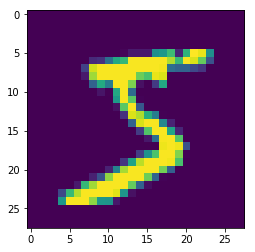

In [7]:
# plot first sample image of x_train
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [13]:
x_train.dtype

dtype('uint8')

In [10]:
# normalize the values to [0, 1], as a float
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
x_train_norm /= 255
x_test_norm /= 255

In [25]:
# reshape train and test data
x_train_norm_reshaped = x_train_norm.reshape(x_train_norm.shape[0], 28, 28, 1) # samples, height, width, channels
x_test_norm_reshaped = x_test_norm.reshape(x_test_norm.shape[0], 28, 28, 1)
print(x_train_norm_reshaped.shape) # confirm reshape is correct

(60000, 28, 28, 1)


In [26]:
print('train label shape', y_train.shape)
print('first 10 labels', y_train[:10])

train label shape (60000,)
first 10 labels [5 0 4 1 9 2 1 3 1 4]


In [27]:
# convert train labels to categorical classes
y_train_c = np_utils.to_categorical(y_train, 10)
y_test_c = np_utils.to_categorical(y_test,10)
print('label shape now:', y_train_c.shape)
print('first 10 labels:\n', y_train_c[:10])

label shape now: (60000, 10)
first 10 labels:
 [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [82]:
# build NN model(1-layer)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=optimizers.sgd(lr=0.1), metrics=['accuracy'])

In [43]:
y_train_c_reshaped = y_train_c.reshape(y_train_c.shape[0],1,1,10)
y_test_c_reshaped = y_test_c.reshape(y_test_c.shape[0],1,1,10)

In [53]:
model.output_shape

(None, 10)

In [67]:
# fit model
model.fit(x_train_norm_reshaped, y_train_c, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.0283 - acc: 0.8220
Epoch 2/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0138 - acc: 0.9104
Epoch 3/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0127 - acc: 0.9171
Epoch 4/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.0121 - acc: 0.9215
Epoch 5/10
60000/60000 [==============================] - 24s 402us/step - loss: 0.0116 - acc: 0.9249
Epoch 6/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.0111 - acc: 0.9279
Epoch 7/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.0107 - acc: 0.9312
Epoch 8/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.0102 - acc: 0.9346
Epoch 9/10
60000/60000 [==============================] - 35s 581us/step - loss: 0.0097 - acc: 0.9387
Epoch 10/10
60000/60000 [==============================] - 32s 533us/step - loss: 

In [68]:
# score the model with the test data
score = model.evaluate(x_test_norm_reshaped, y_test_c, verbose=1)
score

10000/10000 [==============================] - 2s 212us/step


[0.0088659454149485097, 0.94279999999999997]

In [83]:
# cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
print('Scores:')
for traini, testi in skf.split(x_train_norm_reshaped, y_train):
    model.fit(x_train_norm_reshaped[traini], y_train_c[traini], batch_size=32, epochs=8, verbose=0)
    print('Score:', model.evaluate(x_train_norm_reshaped[testi], y_train_c[testi]))

Scores:
20004/20004 [==============================] - 3s 156us/step
Score: [0.012143852326196311, 0.92061587682463508]
19999/19999 [==============================] - 3s 153us/step
Score: [0.0099316269636154728, 0.93594679729814168]
19997/19997 [==============================] - 3s 157us/step
Score: [0.0072675501430646923, 0.95549332399859976]


In [84]:
# build 2-layer NN model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # first layer 2d-convolution
model2.add(MaxPooling2D(pool_size=(2,2))) # second later 2d max pooling
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.sgd(lr=0.05), metrics=['accuracy'])

In [74]:
model2.fit(x_train_norm_reshaped, y_train_c, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.3480 - acc: 0.8966
Epoch 2/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.1537 - acc: 0.9569
Epoch 3/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.1016 - acc: 0.9716
Epoch 4/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.0808 - acc: 0.9768
Epoch 5/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0701 - acc: 0.9794
Epoch 6/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0626 - acc: 0.9819
Epoch 7/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.0571 - acc: 0.9831
Epoch 8/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.0528 - acc: 0.9842
Epoch 9/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.0490 - acc: 0.9857
Epoch 10/10
60000/60000 [==============================] - 28s 467us/step - loss: 

In [75]:
score2 = model2.evaluate(x_test_norm_reshaped, y_test_c, verbose=1)
score2

10000/10000 [==============================] - 1s 150us/step


[0.055043330189166594, 0.98260000000000003]

In [86]:
# cross validation for 2-layer NN
skf = StratifiedKFold(n_splits=3)
print('Scores:')
for traini, testi in skf.split(x_train_norm_reshaped, y_train):
    model2.fit(x_train_norm_reshaped[traini], y_train_c[traini], batch_size=32, epochs=8, verbose=0)
    print(model2.evaluate(x_train_norm_reshaped[testi], y_train_c[testi]))

Scores:
20004/20004 [==============================] - 3s 150us/step
[0.080776027125734562, 0.97660467906418713]
19999/19999 [==============================] - 3s 125us/step
[0.056507525260152416, 0.98329916491354219]
19997/19997 [==============================] - 3s 125us/step
[0.039801153043284916, 0.98739810971645747]
